# Linear Regression

## pizza price problem

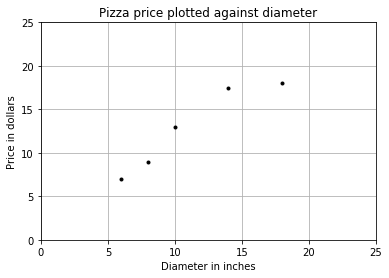

In [3]:
import matplotlib.pyplot as plt
X = [[6],[8],[10],[14],[18]]
y = [[7],[9],[13],[17.5],[18]]
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X,y,'k.')
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

In [11]:
X = [[6],[8],[10],[14],[18]]
y = [[7],[9],[13],[17.5],[18]]
model = LinearRegression()
model.fit(X,y)
print('A 12" pizza should cost: $%.2f' % model.predict([12])[0])

A 12" pizza should cost: $13.68


C:\Users\Kismet\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


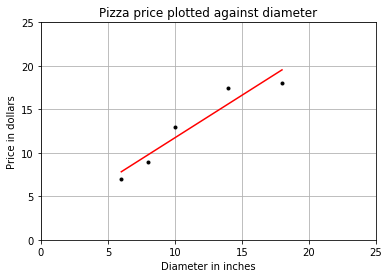

In [13]:
plt.figure()
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X,model.predict(X).reshape(-1,1),color='red')
plt.plot(X,y,'k.')
plt.axis([0,25,0,25])
plt.grid(True)
plt.show()

In [14]:
import numpy as np
print('Residual sum of squares: %.2f'% np.mean((model.predict(X)-y) **2)) 

Residual sum of squares: 1.75


In [17]:
np.var([6,8,10,14,18],ddof=1)

23.199999999999999

In [19]:
np.cov([6,8,10,14,18],[7,9,13,17.5,18])[0][1]

22.650000000000002

## R squared

In [1]:
from sklearn.linear_model import LinearRegression
X = [[6],[8],[10],[14],[18]]
y = [[7],[9],[13],[17.5],[18]]
X_test = [[8],[9],[11],[16],[12]]
y_test = [[11],[8.5],[15],[18],[11]]
model = LinearRegression()
model.fit(X,y)
print('R-squared: %.4f'% model.score(X_test,y_test))

R-squared: 0.6620


# Multiple linear regression

In [2]:
from numpy.linalg import lstsq   #lstsq 是 LeaST SQuare （最小二乘）的意思。我们常用最小二乘法来求解超定线性方程组
X = [[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]]
y = [[7],[9],[13],[17.5],[18]]
print(lstsq(X,y)[0])

[[ 1.1875    ]
 [ 1.01041667]
 [ 0.39583333]]


In [4]:
from sklearn.linear_model import LinearRegression
X = [[6,2],[8,1],[10,0],[14,2],[18,0]]
y = [[7],[9],[13],[17.5],[18]]
model = LinearRegression()
model.fit(X,y)
X_test = [[8,2],[9,0],[11,2],[16,2],[12,0]]
y_test = [[11],[8.5],[15],[18],[11]]
predictions = model.predict(X_test)
for i,prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction,y_test[i]))
print('R-squared: %.2f'% model.score(X_test,y_test))

Predicted: [ 10.0625], Target: [11]
Predicted: [ 10.28125], Target: [8.5]
Predicted: [ 13.09375], Target: [15]
Predicted: [ 18.14583333], Target: [18]
Predicted: [ 13.3125], Target: [11]
R-squared: 0.77


# Polynomial regression

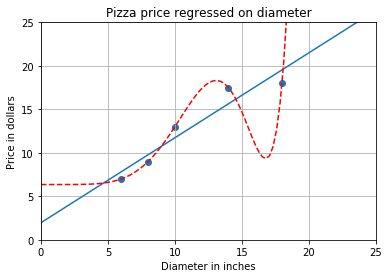

[[6], [8], [10], [14], [18]]
[[  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000000e+02
    1.29600000e+03   7.77600000e+03   4.66560000e+04   2.79936000e+05
    1.67961600e+06   1.00776960e+07]
 [  1.00000000e+00   8.00000000e+00   6.40000000e+01   5.12000000e+02
    4.09600000e+03   3.27680000e+04   2.62144000e+05   2.09715200e+06
    1.67772160e+07   1.34217728e+08]
 [  1.00000000e+00   1.00000000e+01   1.00000000e+02   1.00000000e+03
    1.00000000e+04   1.00000000e+05   1.00000000e+06   1.00000000e+07
    1.00000000e+08   1.00000000e+09]
 [  1.00000000e+00   1.40000000e+01   1.96000000e+02   2.74400000e+03
    3.84160000e+04   5.37824000e+05   7.52953600e+06   1.05413504e+08
    1.47578906e+09   2.06610468e+10]
 [  1.00000000e+00   1.80000000e+01   3.24000000e+02   5.83200000e+03
    1.04976000e+05   1.88956800e+06   3.40122240e+07   6.12220032e+08
    1.10199606e+10   1.98359290e+11]]
[[6], [8], [11], [16]]
[[  1.00000000e+00   6.00000000e+00   3.60000000e+01   2.16000

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6],[8],[10],[14],[18]]
y_train = [[7],[9],[13],[17.5],[18]]
X_test = [[6],[8],[11],[16]]
y_test = [[8],[12],[15],[18]]
regressor = LinearRegression()
regressor.fit(X_train,y_train)
xx = np.linspace(0,26,100)
yy = regressor.predict(xx.reshape(xx.shape[0],1))
plt.plot(xx,yy)

quadratic_featurizer = PolynomialFeatures(degree=2)        #更改阶数
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic,y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0],1))
plt.plot(xx,regressor_quadratic.predict(xx_quadratic),c='r',linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(X_train,y_train)
plt.show()

print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared',regressor.score(X_test,y_test))
print('Quadrastic regression r-squared',regressor_quadratic.score(X_test_quadratic,y_test))

# Wine datasets

datasets : https://archive.ics.uci.edu/ml/datasets/Wine

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('./some datasets/wine.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
data.columns = ['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

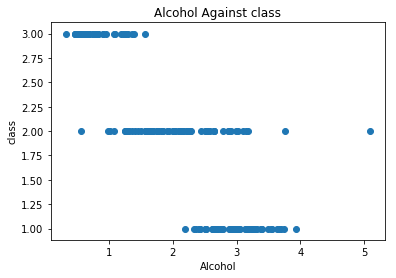

In [21]:
plt.scatter(data['Flavanoids'],data['class'])
plt.xlabel('Alcohol')
plt.ylabel('class')
plt.title('Alcohol Against class')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split

/Users/xueji/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X = data[list(data.columns)[1:]]
y = data[list(data.columns)[0]]
X_train,X_test,y_train,y_test = train_test_split(X,y)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_predictions = regressor.predict(X_test)
print('r-squared: ',regressor.score(X_test,y_test))

r-squared:  0.917084159351


## 交叉检验的实现

In [9]:
from sklearn.cross_validation import cross_val_score
regressor = LinearRegression()
scores = cross_val_score(regressor,X,y,cv=5)
print(scores.mean(),scores)

0.183425405594 [ 0.          0.51460008  0.          0.40252695  0.        ]


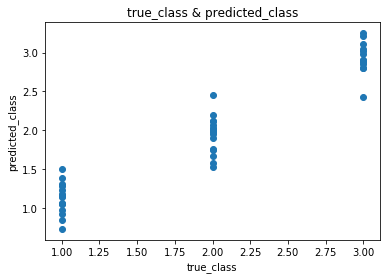

In [10]:
plt.scatter(y_test,y_predictions)
plt.xlabel('true_class')
plt.ylabel('predicted_class')
plt.title('true_class & predicted_class')
plt.show()

In [11]:
for t,p in zip(y_test,y_predictions):
    print('Predicted:%s, True:%s' % (p,t))

Predicted:0.917604209662, True:1
Predicted:2.00955127963, True:2
Predicted:2.8821892583, True:3
Predicted:3.21490417233, True:3
Predicted:1.05632080008, True:1
Predicted:2.90999366897, True:3
Predicted:2.11890229528, True:2
Predicted:2.0004470338, True:2
Predicted:1.49633974169, True:1
Predicted:2.80264401812, True:3
Predicted:0.966399401063, True:1
Predicted:1.05065329403, True:1
Predicted:3.10969072623, True:3
Predicted:1.38290660651, True:1
Predicted:2.43016814305, True:3
Predicted:2.02278177001, True:2
Predicted:1.28631019527, True:1
Predicted:1.95084690492, True:2
Predicted:2.19229493799, True:2
Predicted:1.7488666495, True:2
Predicted:1.30154203668, True:1
Predicted:1.52353218958, True:2
Predicted:3.01595003076, True:3
Predicted:1.06093469479, True:1
Predicted:2.06911448043, True:2
Predicted:0.837995284724, True:1
Predicted:0.728661394454, True:1
Predicted:2.44807251127, True:2
Predicted:1.57400393993, True:2
Predicted:2.02611264125, True:2
Predicted:1.18454071887, True:1
Predict

# Boston Housing data

数据来源：https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

数据解释：https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

In [50]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
data = load_boston()
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target)

In [53]:
#归一化处理
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train.reshape(-1,1))
y_train = y_scaler.fit_transform(y_train.reshape(-1,1))
X_test = X_scaler.transform(X_test.reshape(-1,1))
y_test = y_scaler.transform(y_test.reshape(-1,1))

In [55]:
regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor,X_train,y_train,cv=5)
print('交叉验证R方值：',score)
print('交叉验证R方均值：',np.mean(scores))
regressor.fit_transform(X_train,y_train)
print('测试集R方值：',regressor.score(X_test,y_test))

/Users/xueji/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [4927, 379]